In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


# Import Libararies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import dataset

In [3]:
df = pd.read_csv('../input/netflix-original-films-imdb-scores/NetflixOriginals.csv', encoding='latin-1')
df.columns = [col.lower() for col in df.columns]
df.head()

,title,genre,premiere,runtime,imdb score,language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.500,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.600,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.600,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.200,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.400,Hindi


# Checking the dataframe

In [4]:
def check_df(dataframe, head=5):
    """
    check_df(df)
    """
    print('**************-SHAPE-**************')
    print(dataframe.shape)
    print('\n**************-DTYPES-**************')
    print(dataframe.dtypes)
    print('\n**************-HEAD-**************')
    print(dataframe.head(head))
    print('\n**************-TAIL-**************')
    print(dataframe.tail(head))
    print('\n**************-INFO-**************')
    print(dataframe.info())
    print('\n**************-COLUMNS-**************')
    print(dataframe.columns)
    print('\n**************-INDEX-**************')
    print(dataframe.index)
    print('\n**************-IS THERE ANY NULL VALUE?-**************')
    print(dataframe.isnull().values.any())
    print('\n**************-NAN NUMBERS-**************')
    print(dataframe.isnull().sum())
    print('\n**************-DESCRIPTIVE STATISTICS-**************')
    print(dataframe.describe([0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T)

check_df(df)

**************-SHAPE-**************
(584, 6)

**************-DTYPES-**************
title          object
genre          object
premiere       object
runtime         int64
imdb score    float64
language       object
dtype: object

**************-HEAD-**************
             title                  genre           premiere  runtime  imdb score          language
0  Enter the Anime            Documentary     August 5, 2019       58       2.500  English/Japanese
1      Dark Forces               Thriller    August 21, 2020       81       2.600           Spanish
2          The App  Science fiction/Drama  December 26, 2019       79       2.600           Italian
3   The Open House        Horror thriller   January 19, 2018       94       3.200           English
4      Kaali Khuhi                Mystery   October 30, 2020       90       3.400             Hindi

**************-TAIL-**************
                                           title         genre           premiere  runtime  imdb sc

# Grabing variables and their types

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Reporting section
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 584
Variables: 6
cat_cols: 0
num_cols: 2
cat_but_car: 4
num_but_cat: 0


In [6]:
num_cols

['runtime', 'imdb score']

In [7]:
cat_but_car

['title', 'genre', 'premiere', 'language']

# Summary of the numerical columns

In [8]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T, end="\n\n")

    if plot:
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(x=dataframe[numerical_col])
        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[numerical_col])
        plt.show(block=True)

count   584.000
mean     93.577
std      27.762
min       4.000
5%       30.150
10%      51.300
20%      83.000
30%      89.000
40%      94.000
50%      97.000
60%     100.000
70%     105.000
80%     112.000
90%     122.000
95%     132.000
99%     149.000
max     209.000
Name: runtime, dtype: float64



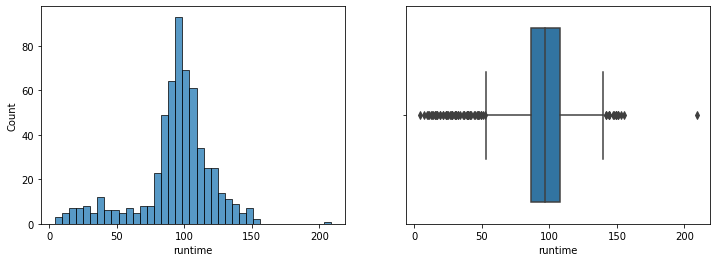

count   584.000
mean      6.272
std       0.979
min       2.500
5%        4.600
10%       5.030
20%       5.500
30%       5.800
40%       6.100
50%       6.350
60%       6.600
70%       6.800
80%       7.100
90%       7.400
95%       7.700
99%       8.317
max       9.000
Name: imdb score, dtype: float64



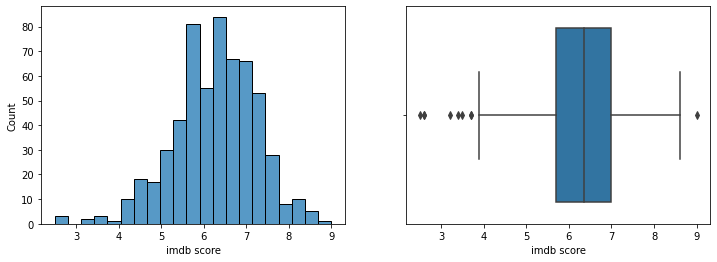

In [9]:
for col in num_cols:
    num_summary(df, col, plot=True)

## In which language were the long-running films created according to the dataset? Make a visualization

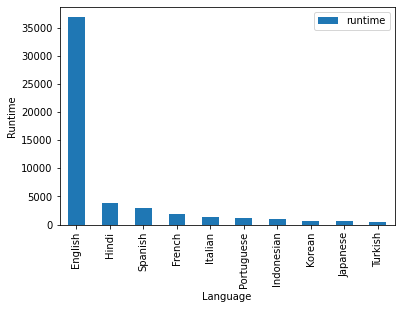

In [10]:
df.groupby('language').agg({'runtime': 'sum'}).sort_values('runtime', ascending=False).head(10).plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Runtime')
plt.show(block=True)

## Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

In [11]:
df['premiere'] = pd.to_datetime(df['premiere'])
df_premiere = df[(df['genre'] == 'Documentary') & (df['premiere'].between('2019-01-01', '2020-06-30'))].sort_values('imdb score', ascending=False)
df_premiere.head()

,title,genre,premiere,runtime,imdb score,language
577,Dancing with the Birds,Documentary,2019-10-23,51,8.300,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.200,English
563,A Secret Love,Documentary,2020-04-29,82,7.900,English
555,Crip Camp: A Disability Revolution,Documentary,2020-03-25,108,7.700,English
554,Brene Brown: The Call to Courage,Documentary,2019-04-19,76,7.700,English


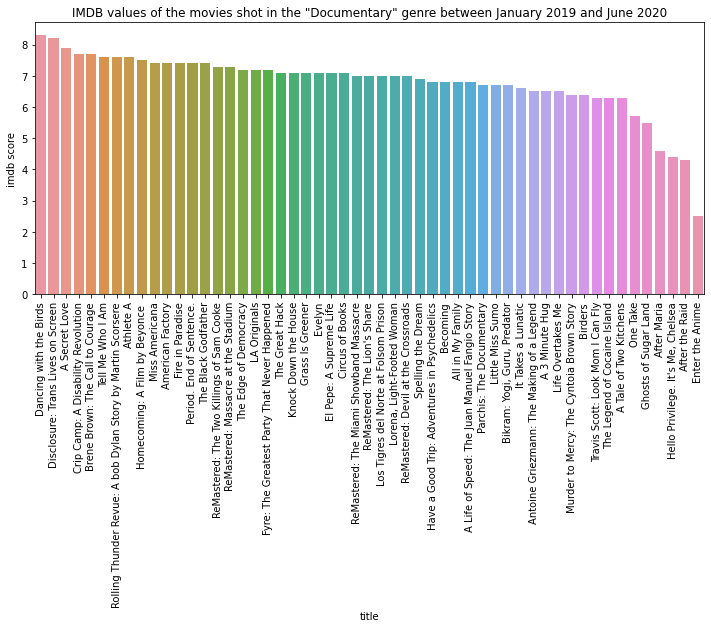

In [12]:
plt.figure(figsize=(12, 5))
sns.barplot(y=df_premiere['imdb score'], x=df_premiere['title'], orient='v')
plt.title('IMDB values of the movies shot in the "Documentary" genre between January 2019 and June 2020')
plt.xticks(rotation=90)
plt.show(block=True)

## Which genre has the highest IMDB rating among movies shot in English?

In [13]:
df_english = df[df['language'] == 'English'].sort_values('imdb score', ascending=False)
df_english.head()

,title,genre,premiere,runtime,imdb score,language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.000,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.500,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.400,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.400,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.300,English


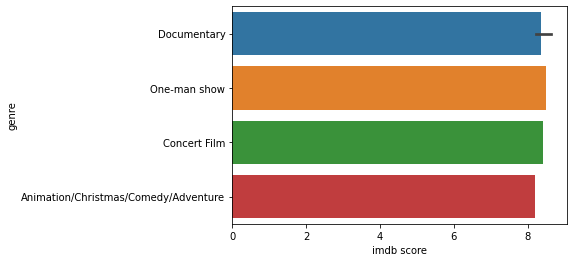

In [14]:
sns.barplot(y=df_english['genre'].head(10), x=df_english['imdb score'])
plt.show(block=True)

## What is the average 'runtime' of movies shot in "Hindi" language?


In [15]:
round(df[df['language'] == 'Hindi']['runtime'].mean(), 2)

115.79

## How many categories does the "Genre" Column have, and what are those categories? Express it visually.


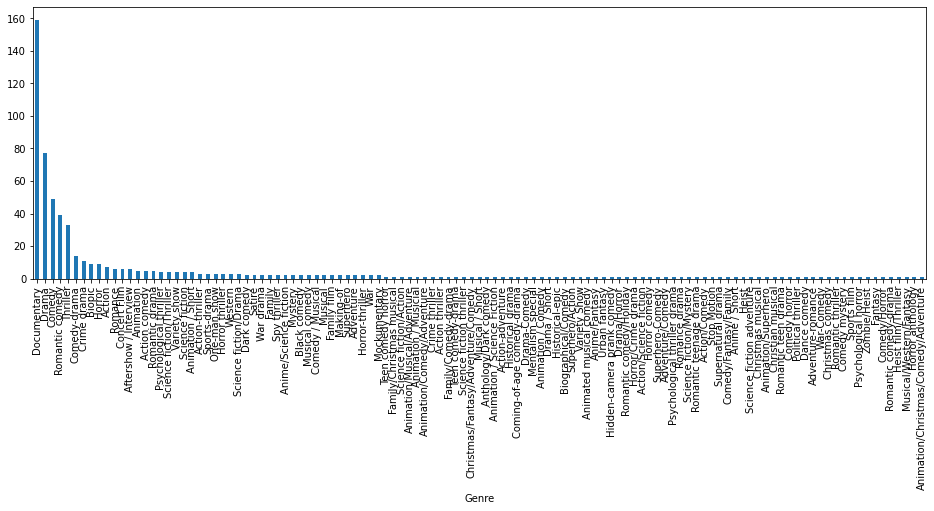

In [16]:
plt.figure(figsize=(16, 5))
df['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show(block=True)

In [17]:
df['genre'].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: genre, Length: 115, dtype: int64

## Find the 3 most used languages in the movies in the data set.

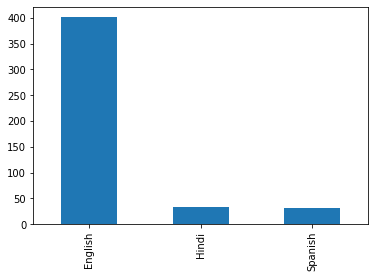

In [18]:
df_lang = df['language'].value_counts()
df_lang.head(3).plot(kind='bar')
plt.show(block=True)

## What are the top 10 movies with the highest IMDB rating?

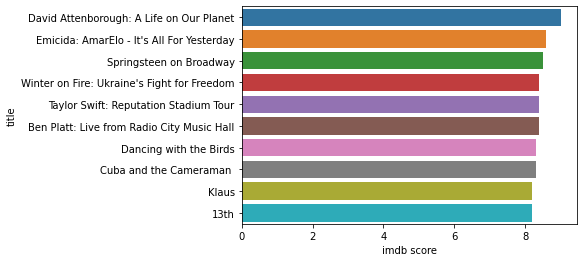

In [19]:
df_movie = df[['title', 'imdb score']].sort_values('imdb score', ascending=False).head(10)
sns.barplot(y='title', x='imdb score', data=df_movie)
plt.show(block=True)

## What is the correlation between IMDB score and 'Runtime'? Examine and visualize.

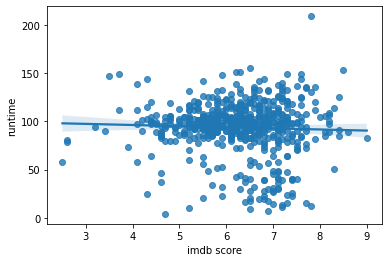

The correlation between runtime and imdb score is -0.041.


In [20]:
sns.regplot(x='imdb score', y='runtime', data=df)
plt.show(block=True)
x = round(df['imdb score'].corr(df['runtime']), 3)
print(f'The correlation between runtime and imdb score is {x}.')

## Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.

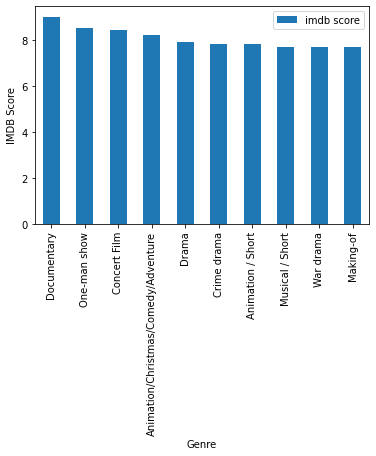

In [21]:
df[['genre', 'imdb score']].sort_values('imdb score', ascending=False).drop_duplicates('genre').head(10).plot(x='genre', y='imdb score', kind='bar')
plt.xlabel('Genre')
plt.ylabel('IMDB Score')
plt.show(block=True)

## What are the top 10 movies with the highest 'runtime'? Visualize it.

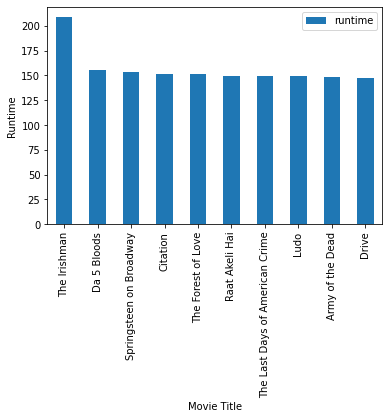

In [22]:
df[['title', 'runtime']].sort_values('runtime', ascending=False).head(10).plot(x='title', y='runtime', kind='bar')
plt.xlabel('Movie Title')
plt.ylabel('Runtime')
plt.show(block=True)

## In which year was the most movies released? Visualize it.

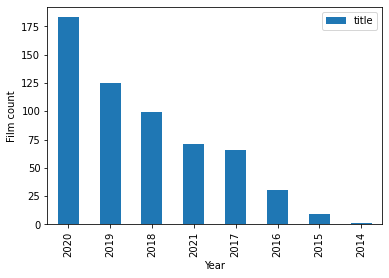

In [23]:
df['year'] = df['premiere'].dt.year
df.groupby('year').agg({'title': 'count'}).sort_values('title', ascending=False).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Film count')
plt.show(block=True)

## Which language movies have the lowest average IMBD ratings? Visualize it.

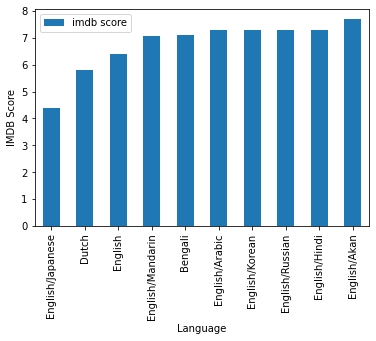

In [24]:
df.groupby('language').agg({'imdb score': 'mean'}).head(10).sort_values('imdb score', ascending=True).plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('IMDB Score')
plt.show(block=True)

## Which year has the greatest total runtime?

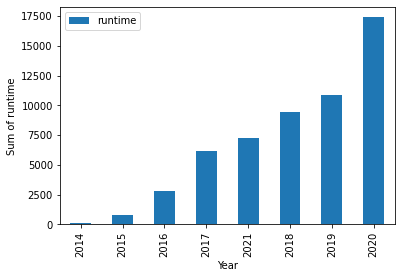

In [25]:
df.groupby('year').agg({'runtime': 'sum'}).sort_values('runtime', ascending=True).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Sum of runtime')
plt.show(block=True)

## What is the "Genre" where each language is used the most?

In [26]:
df.groupby(['language']).agg({'genre': 'max'})

,genre
language,
Bengali,Documentary
Dutch,Romantic comedy
English,Zombie/Heist
English/Akan,War drama
English/Arabic,Documentary
...,...
Swedish,Thriller
Tamil,Drama
Thai,Horror


## Is there any outlier data in the data set? Please explain.

In [27]:
num_cols

['runtime', 'imdb score']

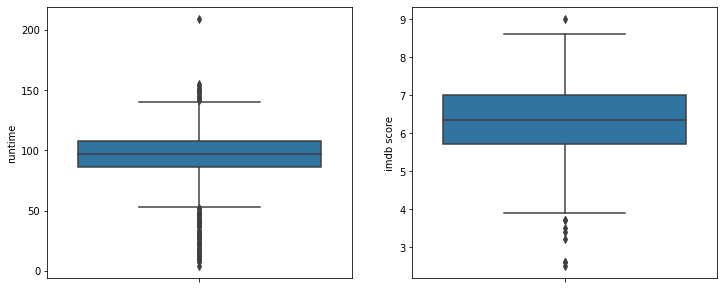

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['runtime'])
plt.subplot(1, 2, 2)
sns.boxplot(y=df['imdb score'])
plt.show(block=True)